<a href="https://colab.research.google.com/github/rishithakonaje/ML_Assignment_1/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***WARM UP***




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
d1 = pd.read_csv('netflix_titles.csv')

In [ ]:
d1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
d1.head

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

In [ ]:
d1.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
d1.std()

<ipython-input-239-a166a9d46136>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.std()


release_year    8.819312
dtype: float64

In [ ]:
print(d1.shape)

(8807, 12)


In [ ]:
missing_values = d1.isnull().sum(axis=0)
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
d1_filled = d1.fillna(d1.mode().iloc[0])

In [ ]:
d1_dropped = d1.dropna()
missing_values_dropped = d1_dropped.isnull().sum(axis=0)
print(missing_values_dropped)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
missing_values_filled = d1_filled.isnull().sum(axis=0)
print(missing_values_filled)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
string_columns = d1.select_dtypes(include=['object']).columns

In [ ]:
for column in string_columns:
    d1[column] = pd.Categorical(d1[column])

In [ ]:
print(d1.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


<ipython-input-248-e0fa9ac98266>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = d1.corr()


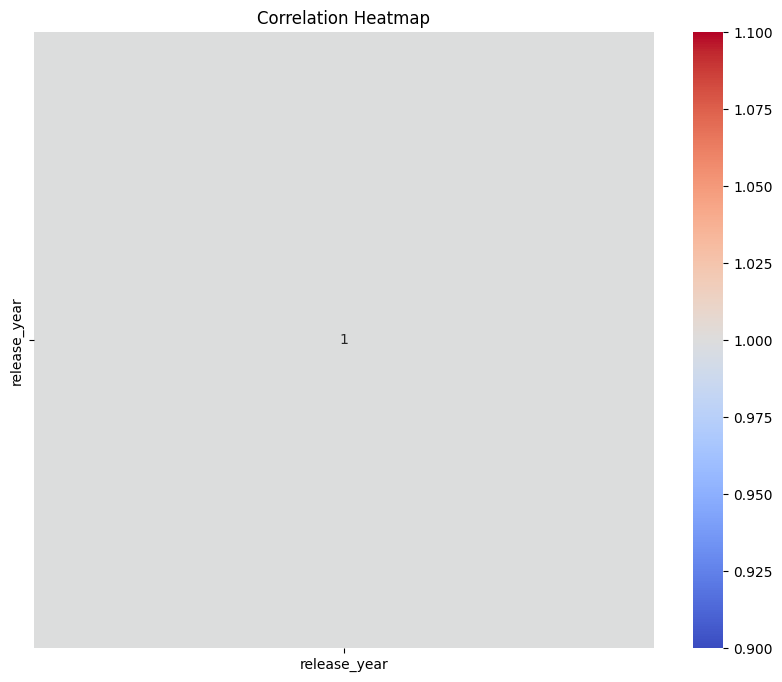

In [ ]:
corr_matrix = d1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

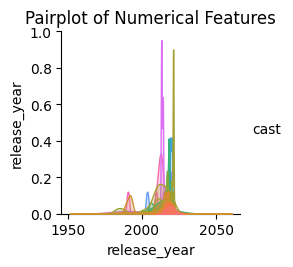

In [ ]:
sns.pairplot(d1, hue='cast')
plt.title("Pairplot of Numerical Features")
plt.show()

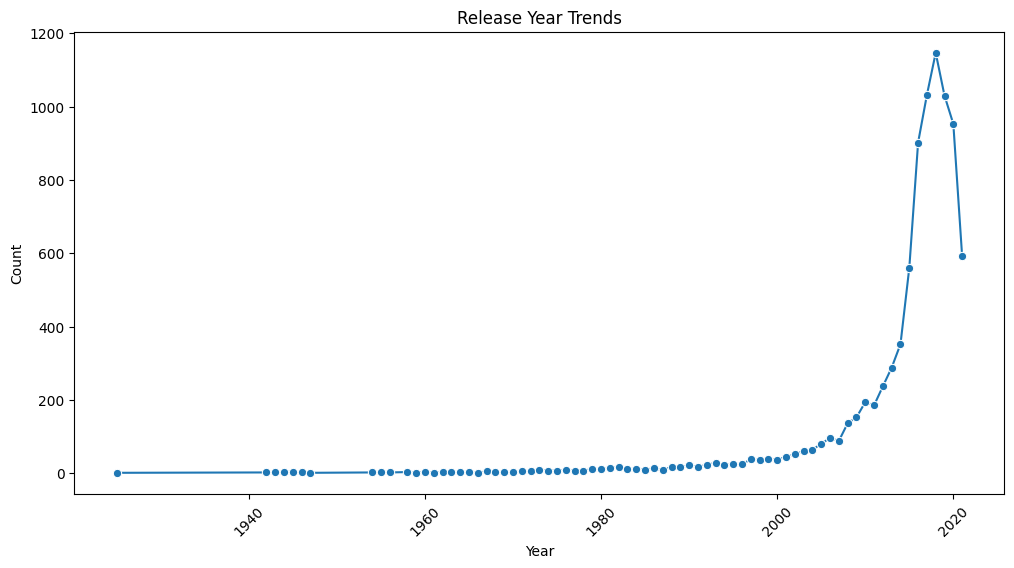

In [ ]:
year_counts = d1['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Release Year Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

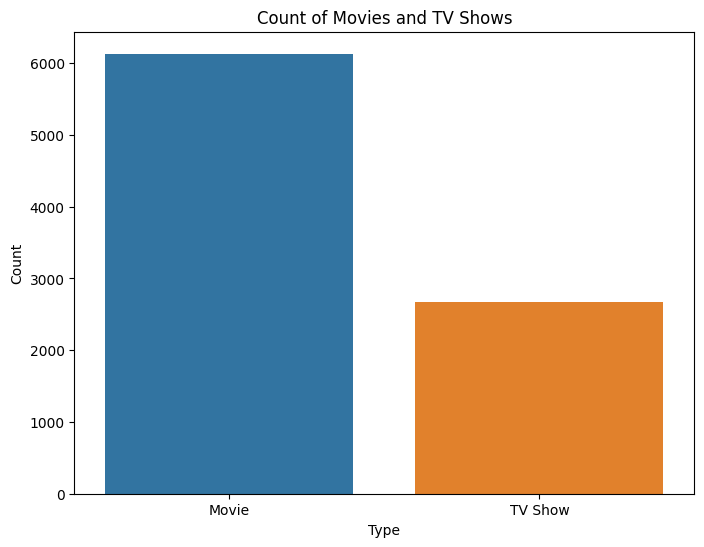

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d1, x='type')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

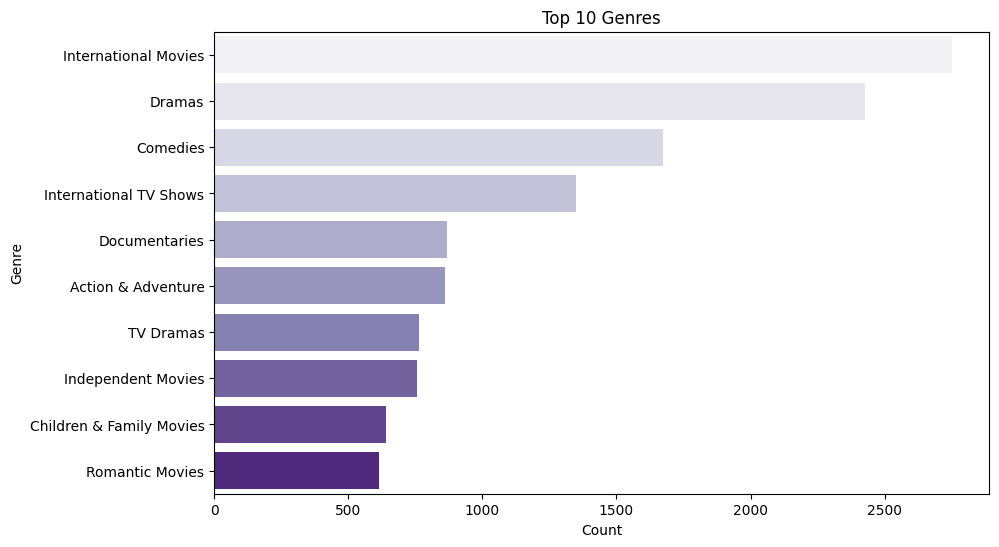

In [ ]:
top_genres = d1['listed_in'].str.split(', ').explode().value_counts()[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Purples')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## ***LINEAR REGRESSION***

In [212]:
d2 = pd.read_csv('winequality-red.csv')

In [213]:
d2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [214]:
missing_values = d2.isnull().sum(axis=0)
print(missing_values)
d2_filled = d2.fillna(d2.mode().iloc[0])
d2_dropped = d2.dropna()
missing_values_dropped = d2_dropped.isnull().sum(axis=0)
print(missing_values_dropped)
missing_values_filled = d2_filled.isnull().sum(axis=0)
print(missing_values_filled)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [215]:
string_columns = d2.select_dtypes(include=['object']).columns
for column in string_columns:
    d2[column] = pd.Categorical(d2[column])
print(d2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [216]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides']
X= d2[selected_features].values
Y= d2['pH'].values

In [217]:
split_ratio = 0.8
split_index = int(split_ratio * len(d2))

In [218]:
X_train = X[:split_index]
Y_train = Y[:split_index]
X_test = X[split_index:]
Y_test = Y[split_index:]

In [219]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1279, 5)
Y_train shape: (1279,)
X_test shape: (320, 5)
Y_test shape: (320,)


In [220]:
X_train_transpose = X_train.T
w = np.linalg.inv(X_train_transpose.dot(X_train)).dot(X_train_transpose).dot(Y_train)
print('Weight Vector (w):', w)

Weight Vector (w): [ 0.24028299  1.76486953 -0.58184548  0.0878908   2.09170499]


In [222]:
Y_pred = X_test.dot(w)
mse = np.mean((Y_test - Y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4180640912571601


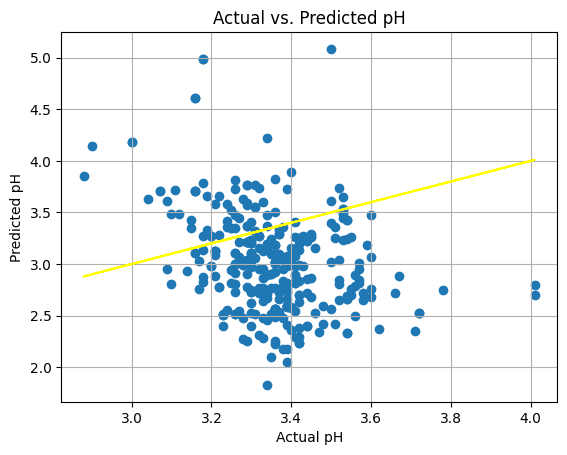

In [155]:
plt.scatter(Y_test, Y_pred, marker='o')
plt.plot(Y_test,Y_test,color='yellow',label='Y=X')
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title('Actual vs. Predicted pH')
plt.grid(True)
plt.show()

## ***LOGISTIC REGRESSION***

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
d3 = pd.read_csv('penguins.csv')

In [229]:
d3.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [230]:
missing_values = d3.isnull().sum(axis=0)
print(missing_values)
d3_filled = d3.fillna(d3.mode().iloc[0])
d3_dropped = d3.dropna()
missing_values_dropped = d3_dropped.isnull().sum(axis=0)
print(missing_values_dropped)
missing_values_filled = d3_filled.isnull().sum(axis=0)
print(missing_values_filled)
d3.fillna(d3.mode().iloc[0], inplace=True)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [231]:
string_columns = d3.select_dtypes(include=['object']).columns
for column in string_columns:
    d3[column] = pd.Categorical(d3[column])
print(d3.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [232]:
class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, h, y):
        m = len(y)
        return (1 / m) * np.dot(X.T, (h - y))

    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, X.shape[1])
        self.loss = []

        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            h = self.sigmoid(z)
            gradient = self.gradient_descent(X, h, y)
            self.weights -= self.learning_rate * gradient
            cost = self.cost(h, y)
            self.loss.append(cost)

    def predict(self, X):
        z = np.dot(X, self.weights)
        predicted_probabilities = self.sigmoid(z)
        predictions = [1 if p >= 0.5 else 0 for p in predicted_probabilities]
        return predictions

In [233]:
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    d3[column] = (d3[column] - d3[column].min()) / (d3[column].max() - d3[column].min())

In [234]:
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
min_max = d3[columns_to_normalize].agg([min, max])
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())
d3[columns_to_normalize] = d3[columns_to_normalize].apply(min_max_scaling)

Accuracy: : 86.95652173913044


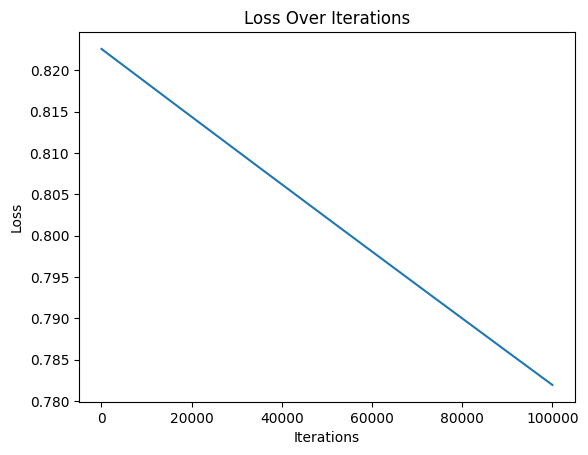

In [236]:
d3['species'] = d3['species'].astype('category').cat.codes
d3['island'] = d3['island'].astype('category').cat.codes
d3['sex'] = d3['sex'].astype('category').cat.codes

X = d3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island', 'sex']].values
y = d3['island'].values

split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

learning_rate = 1e-6
iterations = 100000
model = LogitRegression(learning_rate, iterations)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test[:10] = 1 - y_test[:10]

accuracy = np.mean(y_pred == y_test)
print('Accuracy: :', accuracy*100)

plt.plot(range(iterations), model.loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Over Iterations")
plt.show()